<H2> Lab 6 </H2>

<b> By:-
    
    Ishan Pandey (20893),
    Viswatma (20943),
    Manish Kumar (21044),
    Shubham Chaudhary (21049)
    
    Objective:- 
</b>
    To Simulate Transmon in a Rectangular Cavity Resonator and Analysis of:- 
<ul>
    <li>Change in cavity and qubit frequency with inductor of the transmon qubit Lj</li>
    <li>Change in quality factor and linewidth with change in coupling capacitor</li>
</ul>

<b>Comsol</b>

A Rectangular waveguide Cavity structure was designed with appropriate dimensions and perfect electric conductor boundary condition. At the center(mid cross-section) a Transmon Qubit 
(LC circuit) was placed, the cavity and qubit were coupled with capacitive coupling.
During simulation the capacitor of transmon qubit acts couples with the cavity and the inductance(Lj) of the transmon was varied using parametric sweep to study the change of resonator frequencies.

# We are presenting our findings first, then we will briefly summarize the relevant theory at the end.

# Part One: Results for the transmon simulation on COMSOL

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<b> Parametric sweep of inductance(Lj) of Transmon qubit was done to get different values of cavity frequency and the corresponding transmon frequency  </b>

In [104]:
data = pd.read_csv('C:/Users/gslvs/OneDrive/Desktop/transmon_qubit/grpah_frq_vs_L_1.csv')
data=data.dropna()
data.head()

,L (nH),Frequency (Hz)
0,20.0,4.420000e+09
1,19.0,4.530000e+09
2,18.0,4.660000e+09
3,17.0,4.790000e+09
4,16.0,4.930000e+09


<AxesSubplot: xlabel='L (nH)', ylabel='[Frequency (Hz)]'>

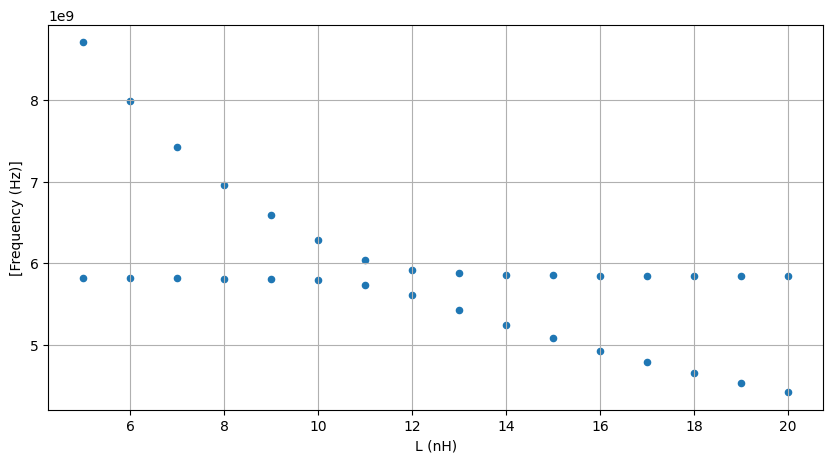

In [105]:
data.plot.scatter(x='L (nH)', y=['Frequency (Hz)'], figsize=(10,5), grid=True) 

<b> Result 1 </b>

It can be observed from the above graph that as we change the inductance(Lj) the transmon frequency changes and of the  with the increase in capacitive gap, capacitive coupling decreases and hence quality factor of the resonator decreases and line width increases.


<b> Plot of Inductance of Qubit L(nH) vs difference of qubit frequency and cavity frequency</b>

<AxesSubplot: xlabel='L (nH)'>

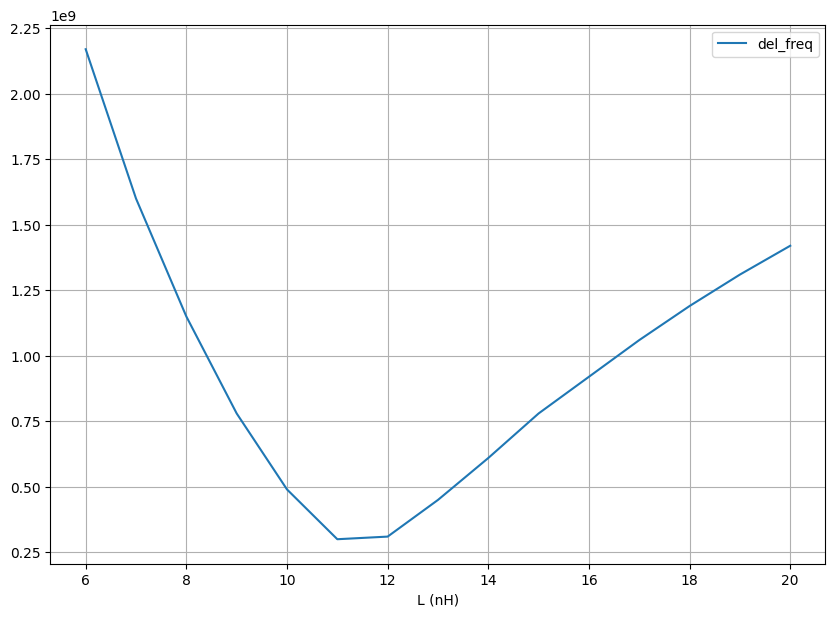

In [106]:
df = pd.DataFrame(columns=['L (nH)','del_freq'])
for i in range(0,16):
    c=data.loc[i][0]
    d=data.loc[i][1]
    for j in range(16,31):
        e=data.loc[j][0]
        if c==e:
                f=data.loc[j][1]-data.loc[i][1]
                df = df.append({'L (nH)': c,'del_freq':f},ignore_index=True)


df.plot(x='L (nH)', y='del_freq', figsize=(10,7), grid=True) 

## Comments on the result:
## This convex graph was expected. 
## It imlies the the minima of this curve is the desired inductance.
## The qubit couples well with the cavity implying efficient exchange of signal between them.


In [ ]:
#----------------------%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%----------------------------#

# Part-2: Theory of a qubit coupled to a microwave resonator.

# Coupled Harmonic oscillators
### Credit: All images taken from internet. 
### Image Source: http://teacher.pas.rochester.edu/PHY235/LectureNotes/Chapter12/Chapter12.pdf

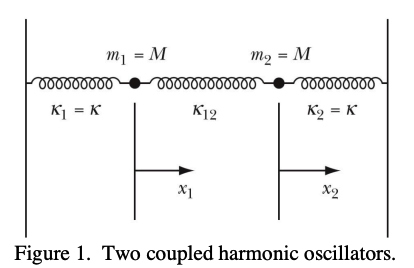

### Force on $m_1$: $ F_1 = -k x_1 + k_{12} (x_2 -x_1) = -(k+k_{12})x_1 + k_{12}x_2 = M \ddot{x_1} $ 
### Force on $m_2$: $ F_2 = -k x_2 + k_{12} (x_1 -x_2) = -(k+k_{12})x_2 + k_{12}x_1 = M \ddot{x_2} $ 

### Which reduces to: $  M \ddot{x_1} + (k+k_{12})x_1 -k_{12} x_2 $  and $  M \ddot{x_1} + (k+k_{12})x_1 -k_{12} x_2 $ 

### Taking the ansatz as following: $x_1(t) = B_1 e^{i\omega t} $  and $x_2(t) = B_2 e^{i\omega t} $


### It has non-trivial solution if the bellow matrix has zero determinant 
\begin{bmatrix} 
	k+k_{12} -M{\omega}^2  & -k_{12} \\
	-k_{12} & k+k_{12} -M{\omega}^2  \\
	\end{bmatrix}
    
    
### Finally the frequency/ normal modes of the system is:
### $ \omega_1 = \pm \sqrt{\frac{k+k_{12}}{M}} $ and $ \omega_2 = \pm \sqrt{\frac{k}{M}} $



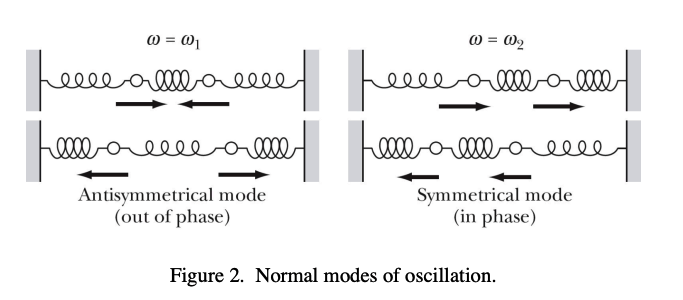

# If the blocks were not coupled using $k_{12}$ then: 

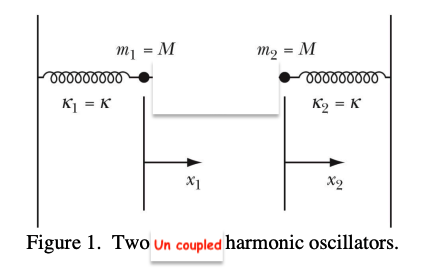

## The frequency of the system will be : 
$ \omega_{10} = \omega_{20} = \sqrt{\frac{k}{M}}  $
## We can notice,  $  \omega_1 =  \sqrt{\frac{k+k_{12}}{M}} > \omega_{10} = \omega_{20} = \sqrt{\frac{k}{M}}  $

# Coupling of a qubit with a microwave resonator
### Image Source: Girvin Book on Circuit QED
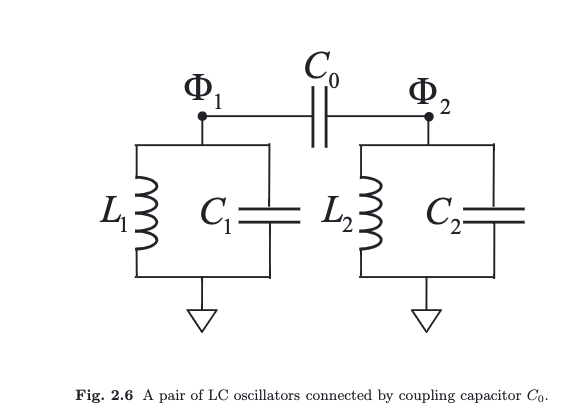

### We can find an analogy for above coupled LC oscillator with coupled block-spring system 
### $ m\ (mass)  \rightarrow L\ (inductance)$
### $ k\ (spring\ constant)\rightarrow \frac{1}{C}\ (capacitance) $
### $x\ (position) \rightarrow Q\ (charge)$
### $ k_{12}\ (coupling\ spring)\rightarrow \frac{1}{C_0}\ (coupling\ capacitance) $

### Now we can generalize our understanding coming from spring-mass coupled system to coupled LC system


# Q.Why odd transverse eelctric modes are used to probe transmon?
### Ans: In most general setup of a qubit inside a microwave cavity, qubit is placed at the center.
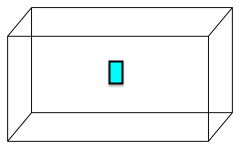

### In case of odd modes, antinodes (of E field) lies in the center as shown in the below figure. Hence, maximum interaction with the field is posssible in those case.
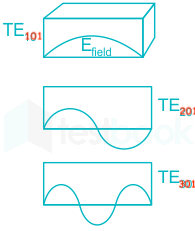